In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + target_file)


rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print(rnaNet.source[0:4, 0:2])
print(rnaNet.target[0:4, 0:2])
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))

[[-1047.59361381   -69.12575067]
 [ -999.46290114   -48.39665354]
 [-1044.10734269   -78.82105825]
 [-1060.32625385   -69.96689896]]
[[-1063.88655395   -92.71360174]
 [-1016.55539065   -76.95176009]
 [-1064.02777643   -84.89484393]
 [-1037.38639806   -88.54170399]]

gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
# breast = re.compile(r'.*breast.*')
# prostate = re.compile(r'.*prostate.*')
# thyroid = re.compile(r'.*thyroid.*')

# ind = rnaNet.source_df.index

# def f(s):
#     if (re.search(breast, s)):
#         return 'breast'
#     elif (re.search(prostate, s)):
#         return 'prostate'
#     elif (re.search(thyroid, s)):
#         return 'thyroid'
    
#     return None

# [f(s) for s in ind]
# rnaNet.source_df.loc[:, "PC1":"PC20"].values


In [5]:
rnaNet.init_res_net()

setting scales using KNN
[24.807923529583384, 49.615847059166768, 99.231694118333536]
setting all scale weights to 1
(636, 20)


In [6]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=100, callbacks=callbacks)

Train on 572 samples, validate on 64 samples
Epoch 1/100
572/572 [==============================] - 1s 1ms/step - loss: 1.2723 - val_loss: 1.9063
Epoch 2/100
572/572 [==============================] - 0s 495us/step - loss: 1.1895 - val_loss: 1.6686
Epoch 3/100
572/572 [==============================] - 0s 497us/step - loss: 1.1059 - val_loss: 1.6410
Epoch 4/100
572/572 [==============================] - 0s 500us/step - loss: 1.0925 - val_loss: 1.6723
Epoch 5/100
572/572 [==============================] - 0s 496us/step - loss: 1.0716 - val_loss: 1.6105
Epoch 6/100
572/572 [==============================] - 0s 501us/step - loss: 1.0612 - val_loss: 1.7116
Epoch 7/100
572/572 [==============================] - 0s 496us/step - loss: 1.0525 - val_loss: 1.5402
Epoch 8/100
572/572 [==============================] - 0s 498us/step - loss: 1.0478 - val_loss: 1.6101
Epoch 9/100
572/572 [==============================] - 0s 498us/step - loss: 1.0524 - val_loss: 1.7508
Epoch 10/100
572/572 [========

572/572 [==============================] - 0s 502us/step - loss: 0.9440 - val_loss: 1.5228
Epoch 80/100
572/572 [==============================] - 0s 505us/step - loss: 0.9520 - val_loss: 1.6014
Epoch 81/100
572/572 [==============================] - 0s 516us/step - loss: 0.9397 - val_loss: 1.6318
Epoch 82/100
572/572 [==============================] - 0s 518us/step - loss: 0.9868 - val_loss: 1.7300
Epoch 83/100
572/572 [==============================] - 0s 500us/step - loss: 0.9559 - val_loss: 1.3204
Epoch 84/100
572/572 [==============================] - 0s 492us/step - loss: 0.9078 - val_loss: 1.7506
Epoch 85/100
572/572 [==============================] - 0s 499us/step - loss: 0.9072 - val_loss: 1.6849
Epoch 86/100
572/572 [==============================] - 0s 495us/step - loss: 0.9133 - val_loss: 1.4050
Epoch 87/100
572/572 [==============================] - 0s 497us/step - loss: 0.9432 - val_loss: 1.5072
Epoch 88/100
572/572 [==============================] - 0s 502us/step - loss:

In [7]:
rnaNet.pca()

In [8]:
%matplotlib inline

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib import patches

def dfScatterHist(df1, df2, axis1, axis2, title=''):
    plt.style.use('ggplot')
    nullfmt = NullFormatter()
    
    sm = {'GTEX': 'o', 'TCGA': '^'}
    
    df1_shape = np.array(list(map(lambda s: sm[s], df1['study'])))
    df2_shape = np.array(list(map(lambda s: sm[s], df2['study'])))

    keys = df1['tissue'].unique()
    values = np.arange(keys.shape[0])

    cm = dict(zip(keys, values))

    df1_color = np.array(list(map(lambda c: cm[c], df1['tissue'])))
    df2_color = np.array(list(map(lambda c: cm[c], df2['tissue'])))

    x1 = df1[axis1].values
    y1 = df1[axis2].values

    x2 = df2[axis1].values
    y2 = df2[axis2].values
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    
    # start with a rectangular Figure
    plt.figure(figsize=(8, 8))
    
    plt.suptitle(title, fontsize=14, fontweight='bold')
       
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    
    axScatter.scatter(x1, y1, c=df1_color, cmap='Accent', marker=sm['GTEX'], label='GTEX')
    axScatter.scatter(x2, y2, c=df2_color, cmap='Accent', marker=sm['TCGA'], label='TCGA')
    
    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(y1))]) + 10
    lim = (int(xymax/binwidth) + 1) * binwidth
    
#     axScatter.set_xlim((-lim, lim))
#     axScatter.set_ylim((-lim, lim))
    
    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x1, bins=bins, color = 'blue', normed=True, stacked = True, histtype='step')
    axHisty.hist(y1, bins=bins, orientation='horizontal', color = 'blue', normed=True, 
                 stacked = True, histtype='step')
    axHistx.hist(x2, bins=bins, color = 'red', normed=True, stacked = True, histtype='step')
    axHisty.hist(y2, bins=bins, orientation='horizontal', color = 'red', normed=True, 
                 stacked = True, histtype='step')
    
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    
    axHistx.set_xticklabels([])
    axHistx.set_yticklabels([])
    axHisty.set_xticklabels([])
    axHisty.set_yticklabels([])
    
    axScatter.set_xlabel(axis1, fontsize=15)
    axScatter.set_ylabel(axis2, fontsize=15)
    
    
    handles, labels = axScatter.get_legend_handles_labels()
    axScatter.legend(handles, labels, bbox_to_anchor=(1.55, 1))
    
    axScatter.colorbar()

    plt.show()
    

AttributeError: 'Axes' object has no attribute 'colorbar'

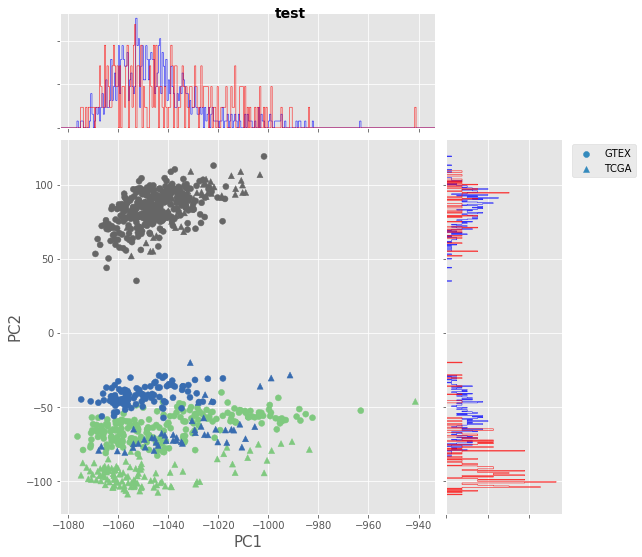

In [69]:
dfScatterHist(rnaNet.source_df, rnaNet.target_df, 'PC1', 'PC2', title='test')

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#df = pd.concat([rnaNet.source_df, rnaNet.target_df])
df1 = rnaNet.source_df
df2 = rnaNet.target_df

sm = {'GTEX': 'o', 'TCGA': '^'}
df1_shape = np.array(list(map(lambda s: sm[s], df1['study'])))
df2_shape = np.array(list(map(lambda s: sm[s], df2['study'])))

keys = df1['tissue'].unique()
values = np.arange(keys.shape[0])

cm = dict(zip(keys, values))

df1_color = np.array(list(map(lambda c: cm[c], df1['tissue'])))
df2_color = np.array(list(map(lambda c: cm[c], df2['tissue'])))

print(sm)
print(cm)

{'GTEX': 'o', 'TCGA': '^'}
{'breast': 0, 'prostate': 1, 'thyroid': 2}


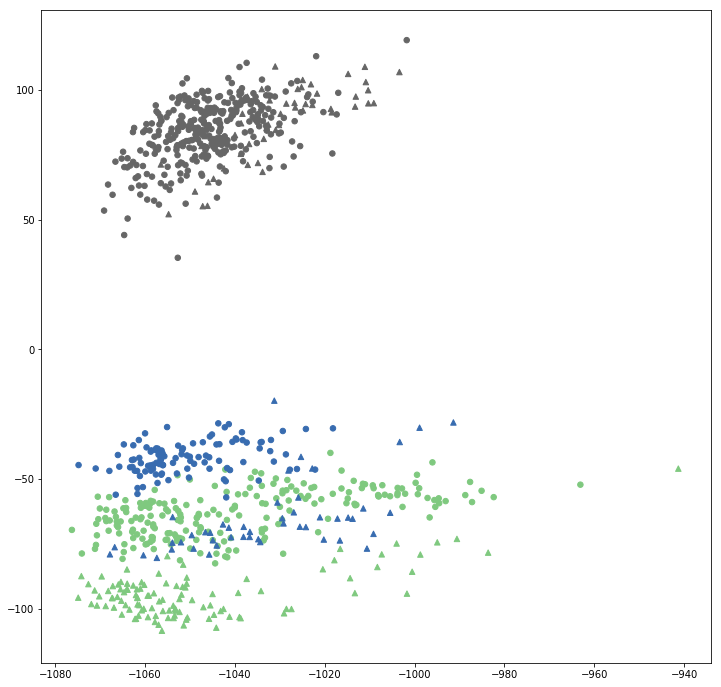

In [12]:
fig = plt.figure(figsize=(12, 12))
#cm = plt.get_cmap('tab10')

x1 = df1['PC1'].values
y1 = df1['PC2'].values

x2 = df2['PC1'].values
y2 = df2['PC2'].values


plt.scatter(x1, y1, c=df1_color, cmap='Accent', marker=sm['GTEX'], s=30)
plt.scatter(x2, y2, c=df2_color, cmap='Accent', marker=sm['TCGA'], s=30)